In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

ROOT = Path("..").resolve()  # assuming notebook is in notebooks/
res      = pd.read_csv(ROOT/"results.csv")
res_met  = pd.read_csv(ROOT/"results_metrics.csv")
dyn      = pd.read_csv(ROOT/"results_dynamic.csv")
dyn_met  = pd.read_csv(ROOT/"results_dynamic_metrics.csv") if (ROOT/"results_dynamic_metrics.csv").exists() else None

FIGDIR = ROOT/"figs"
FIGDIR.mkdir(exist_ok=True)

In [9]:
def to_percent(ax):
    vals = ax.get_yticks()
    ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])

/var/folders/_y/5xqwn5xx5_s9dsm9q1ymghdr0000gn/T/ipykernel_21619/522883407.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])


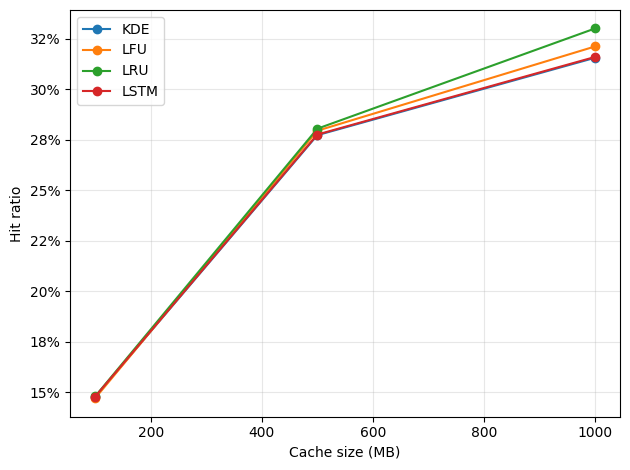

In [10]:
plt.figure()
for name, g in res.groupby("policy"):
    plt.plot(g.cap_MB, g.hit_ratio, marker="o", label=name)
plt.xlabel("Cache size (MB)")
plt.ylabel("Hit ratio")
to_percent(plt.gca())
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(FIGDIR/"fig_hit_vs_size.png", dpi=300)
plt.show()

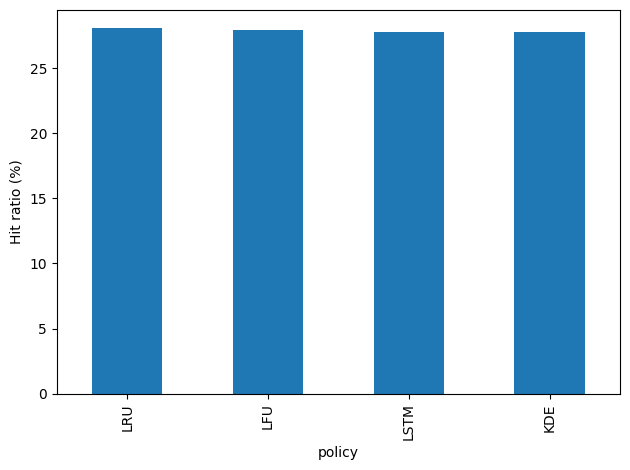

In [11]:
slice500 = res[res.cap_MB==500].set_index("policy").hit_ratio
slice500 = slice500.sort_values(ascending=False)

ax = slice500.mul(100).plot(kind="bar")
ax.set_ylabel("Hit ratio (%)")
plt.tight_layout()
plt.savefig(FIGDIR/"fig_bar_500.png", dpi=300)
plt.show()

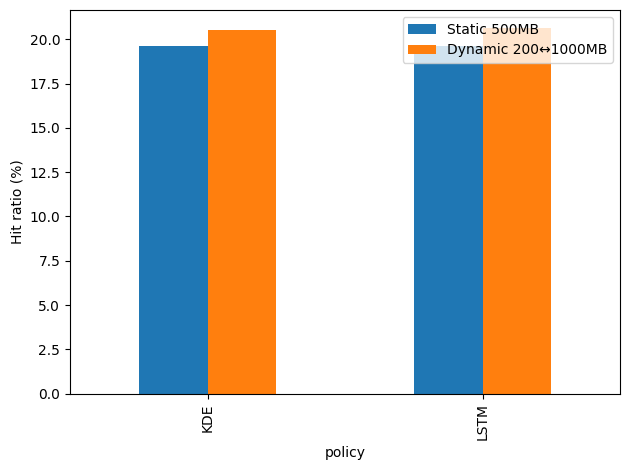

<Figure size 640x480 with 0 Axes>

In [12]:
ax = dyn.set_index("policy").rename(
    columns={"static_500MB":"Static 500MB", "dynamic_200_1000MB":"Dynamic 200↔1000MB"}
).mul(100).plot(kind="bar")
ax.set_ylabel("Hit ratio (%)")
plt.tight_layout()
plt.savefig(FIGDIR/"fig_dynamic.png", dpi=300)
plt.show()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.savefig(FIGDIR/"fig_dynamic_annot.png", dpi=300)

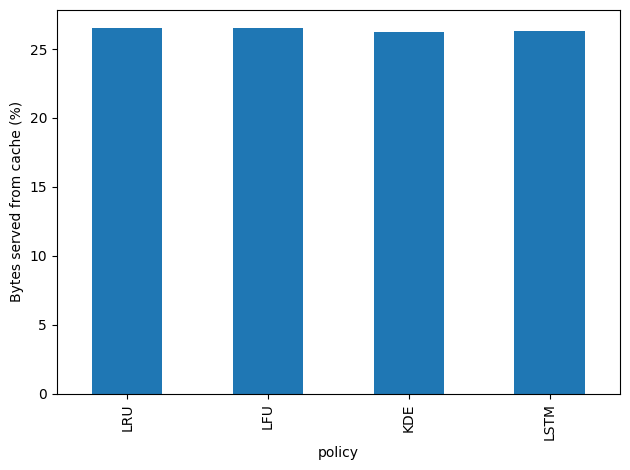

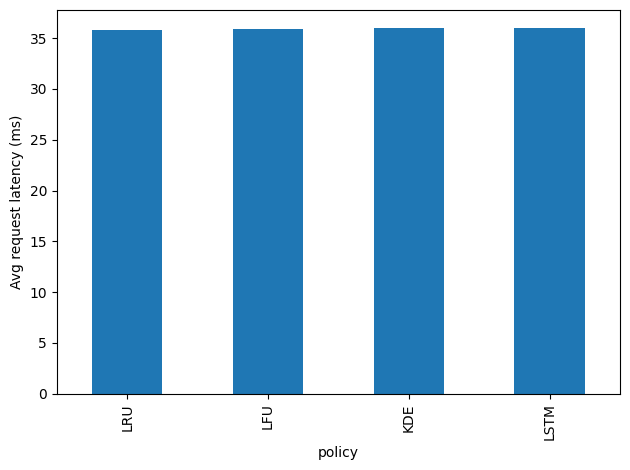

In [13]:
m500 = res_met[res_met.cap_MB==500].set_index("policy")

# Bandwidth saved %
ax = m500.bytes_saved_pct.mul(100).plot(kind="bar")
ax.set_ylabel("Bytes served from cache (%)")
plt.tight_layout()
plt.savefig(FIGDIR/"fig_bytes_saved_500.png", dpi=300)
plt.show()

# Avg latency
ax = m500.avg_latency_ms.plot(kind="bar")
ax.set_ylabel("Avg request latency (ms)")
plt.tight_layout()
plt.savefig(FIGDIR/"fig_latency_500.png", dpi=300)
plt.show()

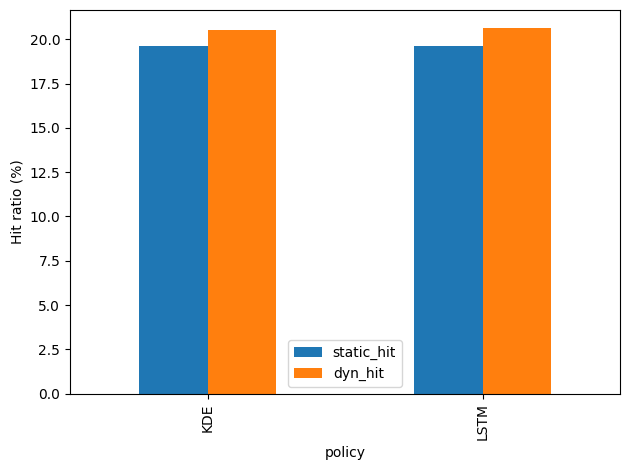

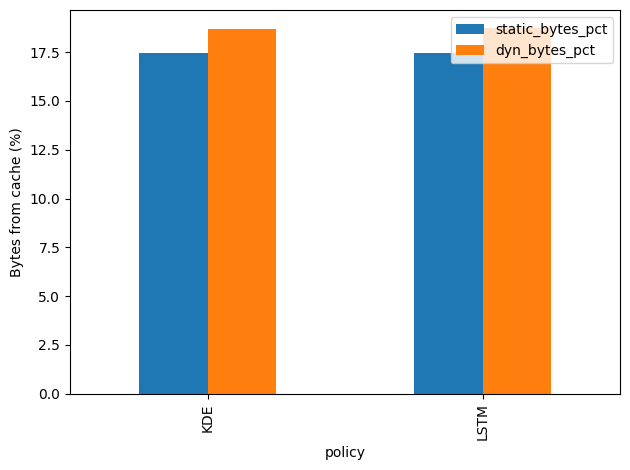

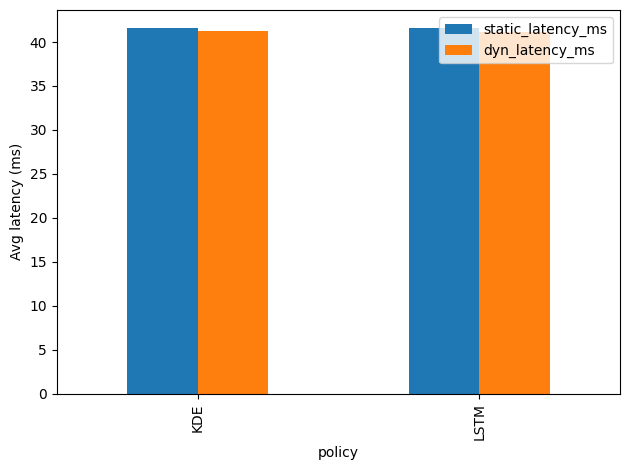

In [14]:
if dyn_met is not None:
    dplot = dyn_met.set_index("policy")[[
        "static_hit","dyn_hit","static_bytes_pct","dyn_bytes_pct","static_latency_ms","dyn_latency_ms"
    ]].copy()

    # Convert some to %
    dplot[["static_hit","dyn_hit","static_bytes_pct","dyn_bytes_pct"]] *= 100

    ax = dplot[["static_hit","dyn_hit"]].plot(kind="bar")
    ax.set_ylabel("Hit ratio (%)")
    plt.tight_layout()
    plt.savefig(FIGDIR/"fig_dyn_metrics_hit.png", dpi=300)
    plt.show()

    ax = dplot[["static_bytes_pct","dyn_bytes_pct"]].plot(kind="bar")
    ax.set_ylabel("Bytes from cache (%)")
    plt.tight_layout()
    plt.savefig(FIGDIR/"fig_dyn_metrics_bytes.png", dpi=300)
    plt.show()

    ax = dplot[["static_latency_ms","dyn_latency_ms"]].plot(kind="bar")
    ax.set_ylabel("Avg latency (ms)")
    plt.tight_layout()
    plt.savefig(FIGDIR/"fig_dyn_metrics_latency.png", dpi=300)
    plt.show()